Load libraries and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import numpy as np
import matplotlib
import itertools
import operator
from sklearn.linear_model import LinearRegression
import math

Load Data.gov.sg weather dataset

In [2]:
df = pd.read_hdf("/home/ottermegazord/PycharmProjects/funstuff/farmx/data/sg_weather.h5")

In [3]:
df.tail(20)

,timestamp,station_id,temperature,humidity,wind_speed,wind_direction,rainfall
27163525,1519204740,S102,NaN,NaN,NaN,54.0,NaN
27163526,1519204860,S102,NaN,NaN,NaN,55.0,NaN
27163527,1519204920,S102,NaN,NaN,NaN,55.0,NaN
27163528,1519204980,S102,NaN,NaN,NaN,54.0,NaN
27163529,1519205040,S102,NaN,NaN,NaN,54.0,NaN
27163530,1519205160,S102,NaN,NaN,NaN,53.0,NaN
27163531,1519205220,S102,NaN,NaN,NaN,52.0,NaN
27163532,1519205280,S102,NaN,NaN,NaN,52.0,NaN
27163533,1519205340,S102,NaN,NaN,NaN,51.0,NaN
27163534,1519205460,S102,NaN,NaN,NaN,51.0,NaN


Extract Sembawang weather station

In [4]:
sembawang = (df[df['station_id'] == 'S122']).reset_index()

In [5]:
len(sembawang['timestamp'])

1151501

View first 10 lines from dataset

In [6]:
sembawang.head(10)

,index,timestamp,station_id,temperature,humidity,wind_speed,wind_direction,rainfall
0,11,1462440840,S122,29.2,NaN,NaN,NaN,NaN
1,32,1462440900,S122,29.2,NaN,NaN,NaN,NaN
2,53,1462440960,S122,29.2,NaN,NaN,NaN,NaN
3,74,1462441020,S122,29.2,NaN,NaN,NaN,NaN
4,95,1462441080,S122,29.3,NaN,NaN,NaN,NaN
5,116,1462441140,S122,29.2,NaN,NaN,NaN,NaN
6,137,1462441200,S122,29.2,NaN,NaN,NaN,NaN
7,158,1462441260,S122,29.2,NaN,NaN,NaN,NaN
8,178,1462441320,S122,29.2,NaN,NaN,NaN,NaN
9,198,1462441380,S122,29.2,NaN,NaN,NaN,NaN


Convert posix time to UTC time

In [7]:
datetime.utcfromtimestamp(sembawang['timestamp'][0]).strftime('%Y-%m-%dT%H:%M:%SZ')

'2016-05-05T09:34:00Z'

In [8]:
def posix2utc(timestamp):
    return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%dT%H:%M:%SZ')

In [9]:
sembawang['time'] = sembawang['timestamp'].apply(posix2utc)

In [10]:
sembawang.head(10)

,index,timestamp,station_id,temperature,humidity,wind_speed,wind_direction,rainfall,time
0,11,1462440840,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:34:00Z
1,32,1462440900,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:35:00Z
2,53,1462440960,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:36:00Z
3,74,1462441020,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:37:00Z
4,95,1462441080,S122,29.3,NaN,NaN,NaN,NaN,2016-05-05T09:38:00Z
5,116,1462441140,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:39:00Z
6,137,1462441200,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:40:00Z
7,158,1462441260,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:41:00Z
8,178,1462441320,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:42:00Z
9,198,1462441380,S122,29.2,NaN,NaN,NaN,NaN,2016-05-05T09:43:00Z


In [11]:
sembawang.isna().sum()

index                  0
timestamp              0
station_id             0
temperature        29104
humidity          591859
wind_speed        320734
wind_direction    312167
rainfall          982984
time                   0
dtype: int64

In [12]:
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

Isolate year, month ... from times

In [13]:
sembawang['year'] = pd.DatetimeIndex(sembawang['time']).year
sembawang['month'] = pd.DatetimeIndex(sembawang['time']).month
sembawang['day'] = pd.DatetimeIndex(sembawang['time']).day
sembawang['hour'] = pd.DatetimeIndex(sembawang['time']).day
sembawang['minute'] = pd.DatetimeIndex(sembawang['time']).day


In [14]:
print(sembawang.head(10))

   index   timestamp station_id  temperature  humidity  wind_speed  \
0     11  1462440840       S122         29.2       NaN         NaN   
1     32  1462440900       S122         29.2       NaN         NaN   
2     53  1462440960       S122         29.2       NaN         NaN   
3     74  1462441020       S122         29.2       NaN         NaN   
4     95  1462441080       S122         29.3       NaN         NaN   
5    116  1462441140       S122         29.2       NaN         NaN   
6    137  1462441200       S122         29.2       NaN         NaN   
7    158  1462441260       S122         29.2       NaN         NaN   
8    178  1462441320       S122         29.2       NaN         NaN   
9    198  1462441380       S122         29.2       NaN         NaN   

   wind_direction  rainfall                  time  year  month  day  hour  \
0             NaN       NaN  2016-05-05T09:34:00Z  2016      5    5     5   
1             NaN       NaN  2016-05-05T09:35:00Z  2016      5    5     5  

Upsample data to 10 min readings

Change index to DatimeIndex

In [15]:
sembawang.index = pd.to_datetime(sembawang.timestamp, unit='s')
sembawang =(sembawang[(sembawang['year'] == 2017)])
sembawang = (sembawang[(sembawang['month'].between(1, 10, inclusive=True))])

In [16]:
upsampledSembawang = sembawang.resample('1H').mean().ffill()

# Plot graphs of features

## Plot of temperature against time

Text(0.5,1,'Temperature against time (Sembawang Station)')

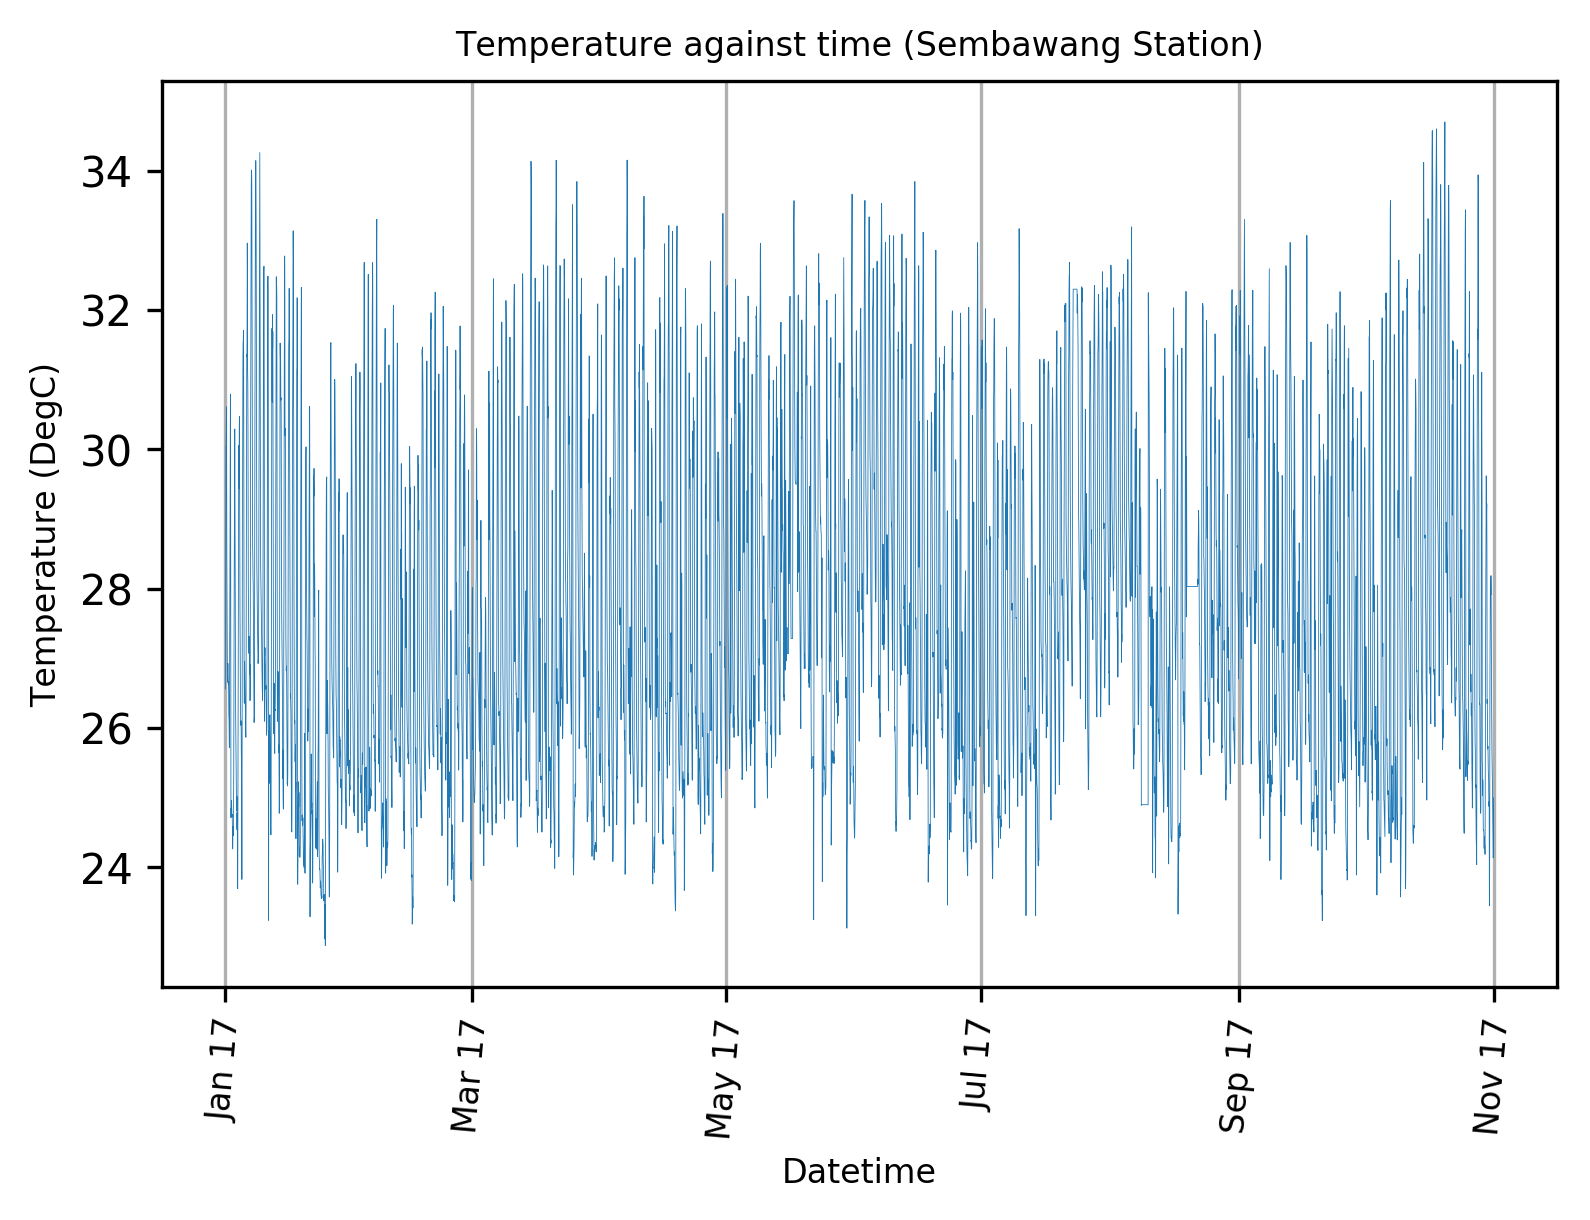

In [17]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledSembawang.index, upsampledSembawang['temperature'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Temperature (DegC)', fontsize=8)
plt.title('Temperature against time (Sembawang Station)', fontsize=8)

In [18]:
upsampledSembawang.shape

(7296, 12)

## Plot of humidity against time

Text(0.5,1,'Humidity against time (Sembawang Station)')

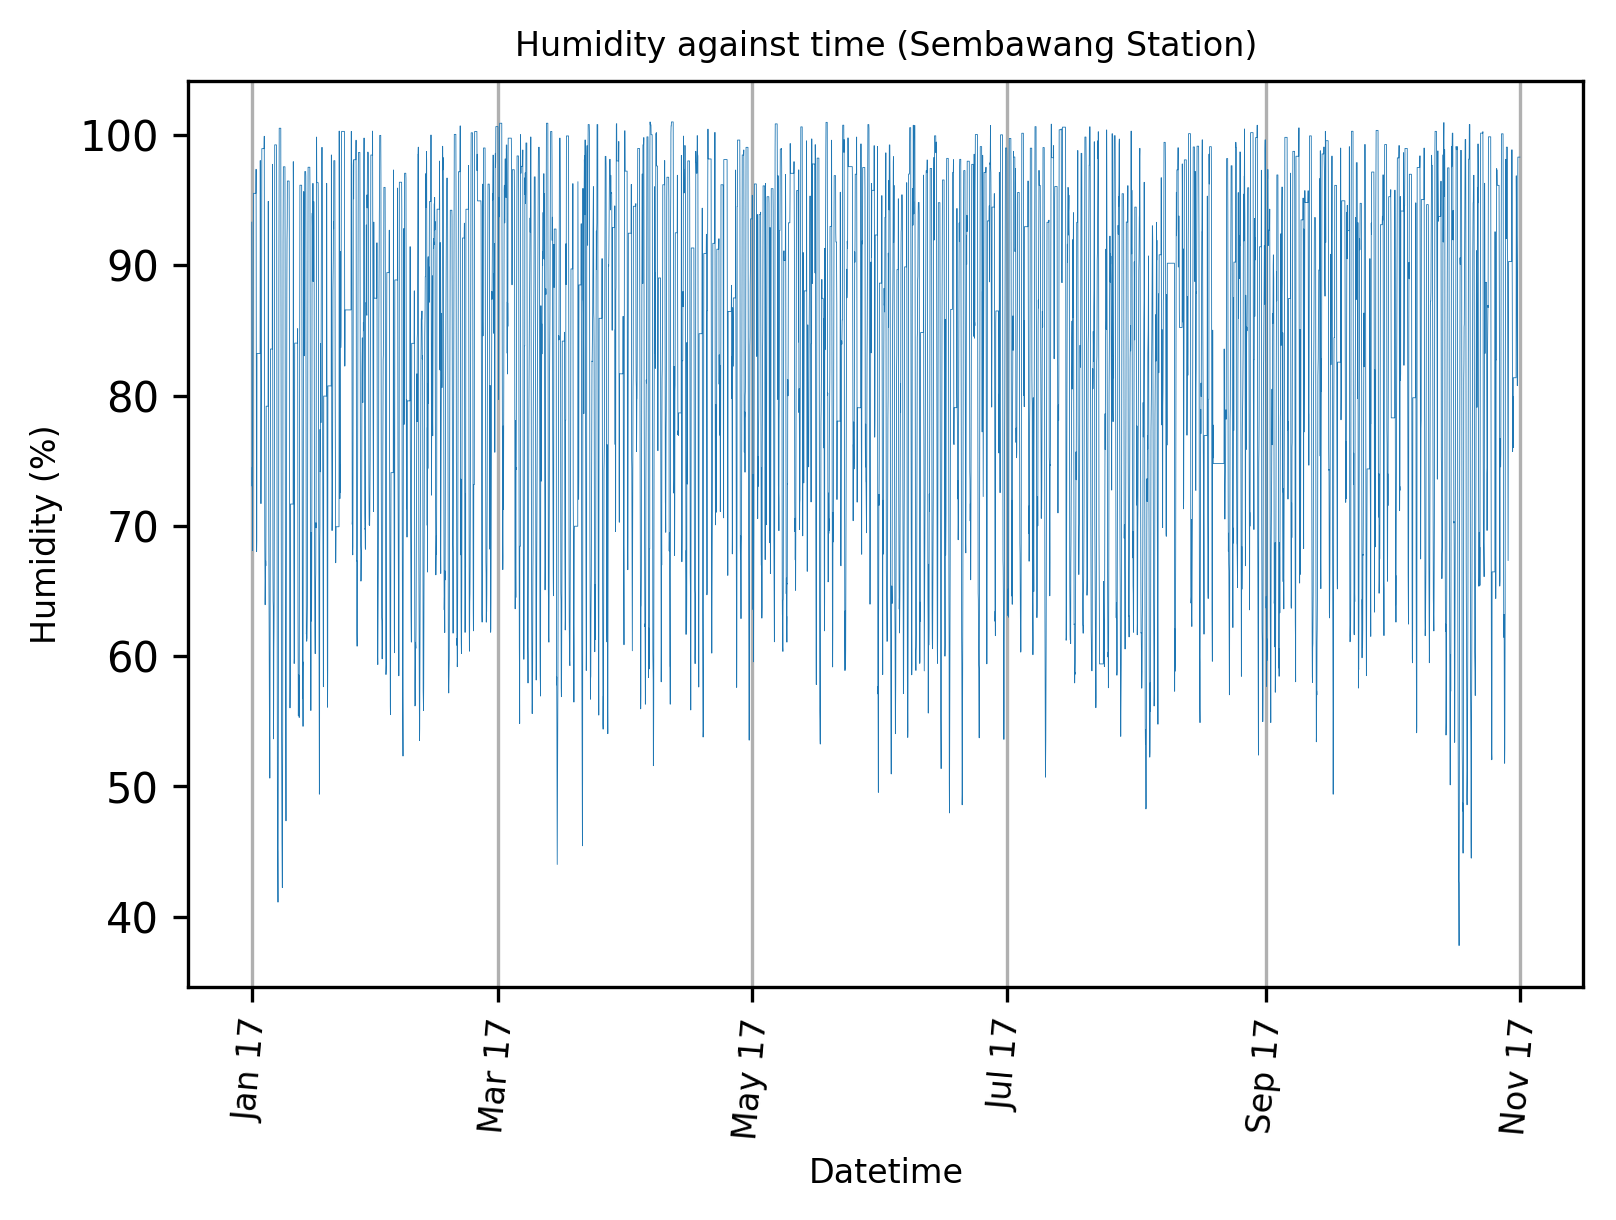

In [19]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledSembawang.index, upsampledSembawang['humidity'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Humidity (%)', fontsize=8)
plt.title('Humidity against time (Sembawang Station)', fontsize=8)

## Plot of Wind Speed against time

Text(0.5,1,'Windspeed against time (Sembawang Station)')

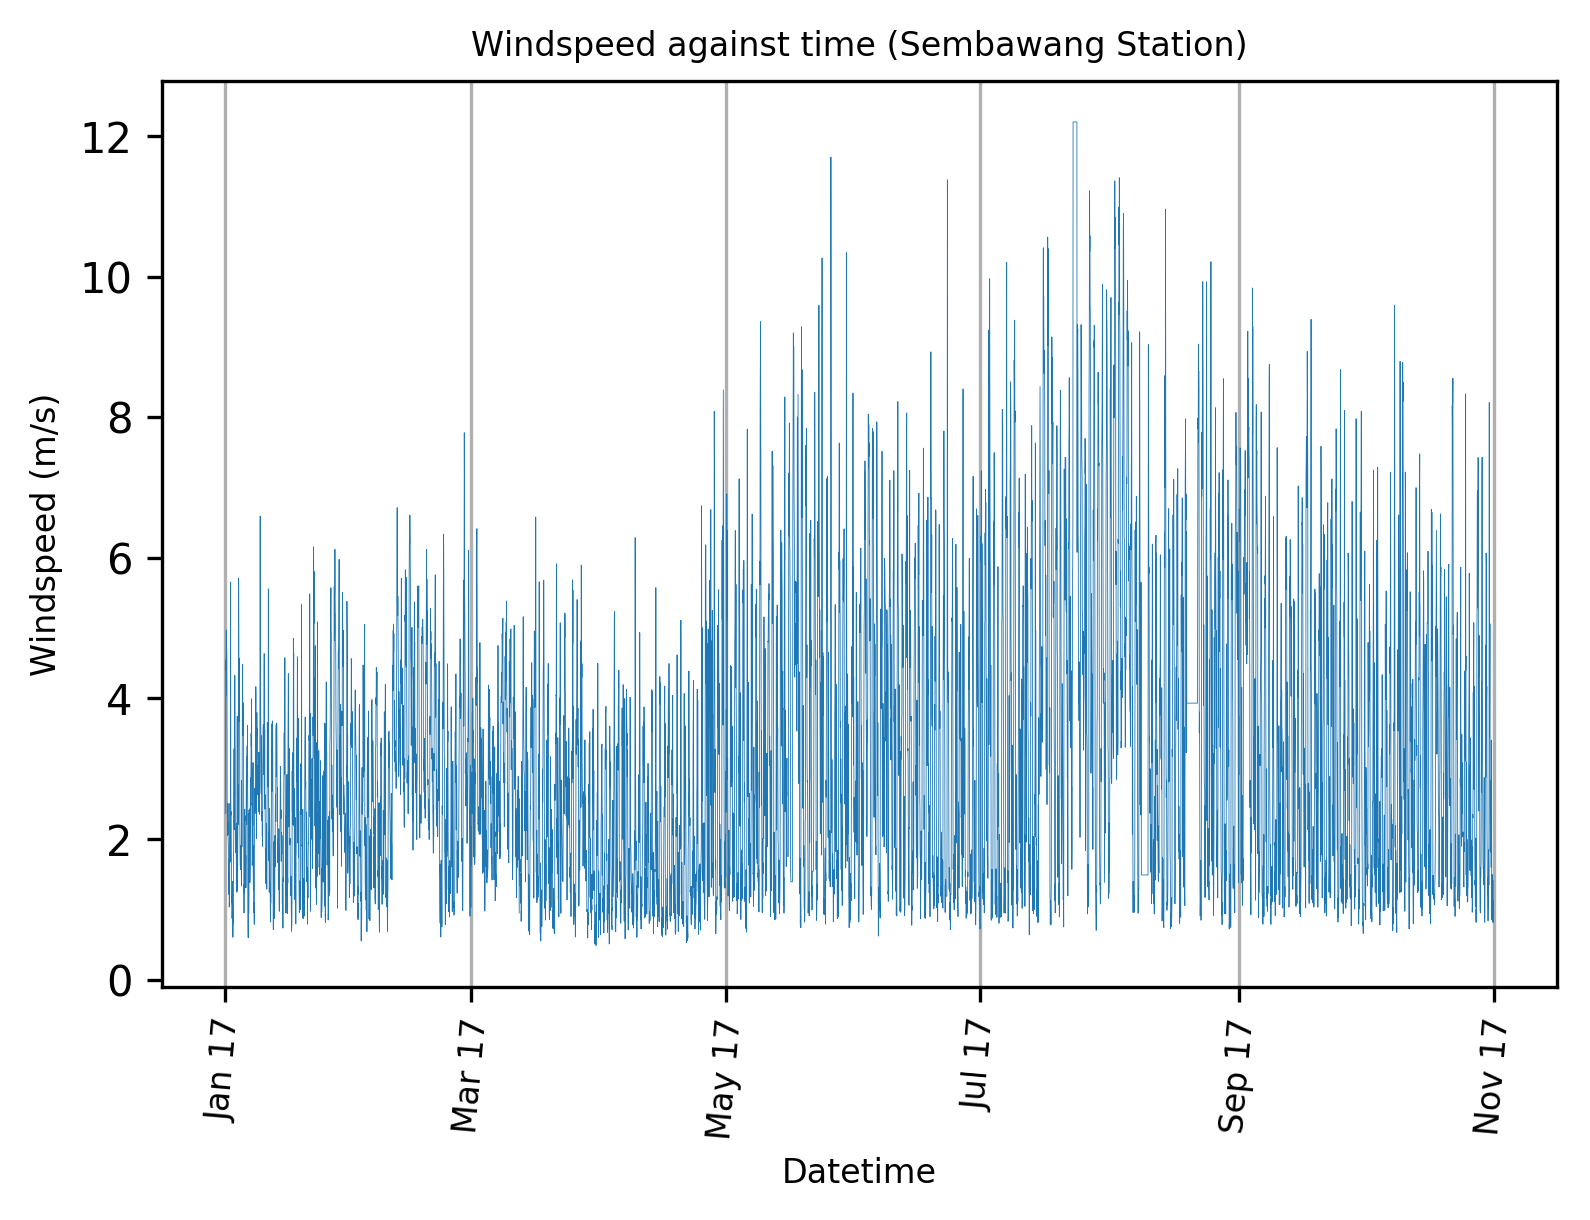

In [20]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledSembawang.index, upsampledSembawang['wind_speed'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Windspeed (m/s)', fontsize=8)
plt.title('Windspeed against time (Sembawang Station)', fontsize=8)

## Plot of Wind Direction against time

Text(0.5,1,'Wind direction against time (Sembawang Station)')

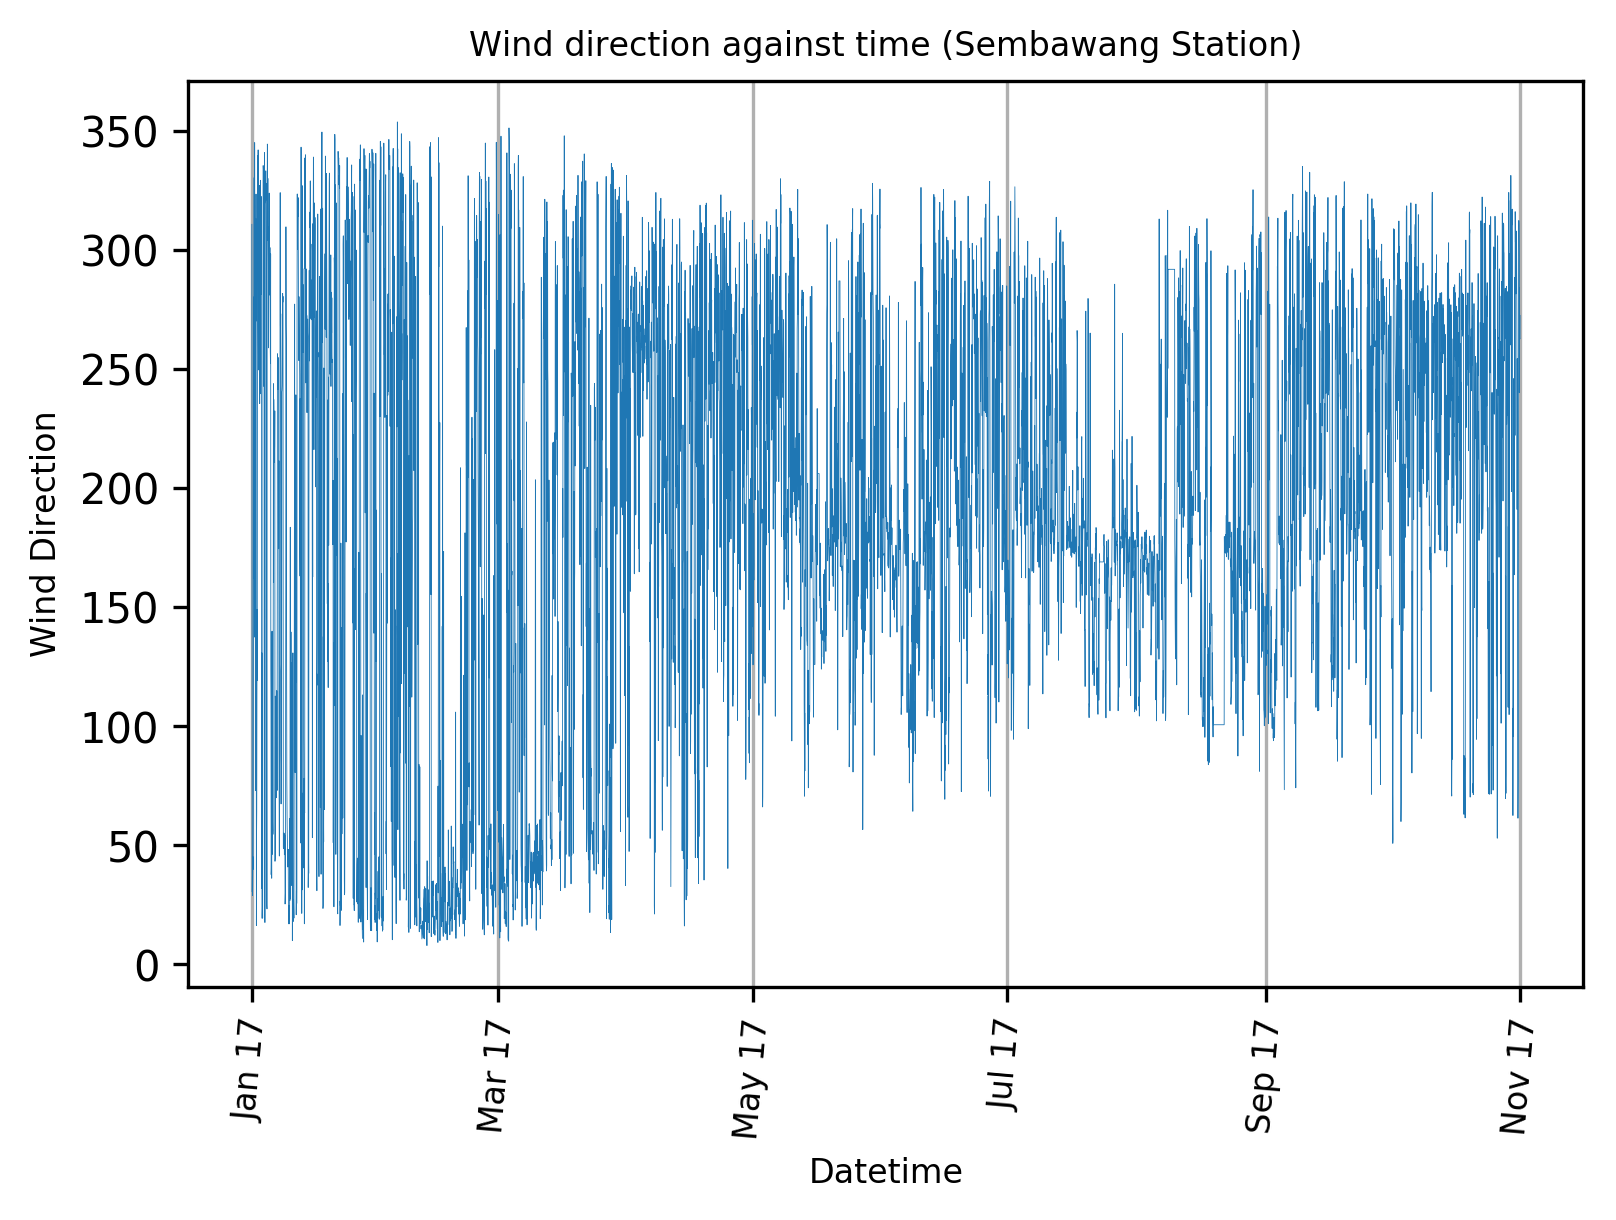

In [21]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledSembawang.index, upsampledSembawang['wind_direction'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Wind Direction', fontsize=8)
plt.title('Wind direction against time (Sembawang Station)', fontsize=8)

## Plot of Rainfall against time

Text(0.5,1,'Rainfall against time (Sembawang Station)')

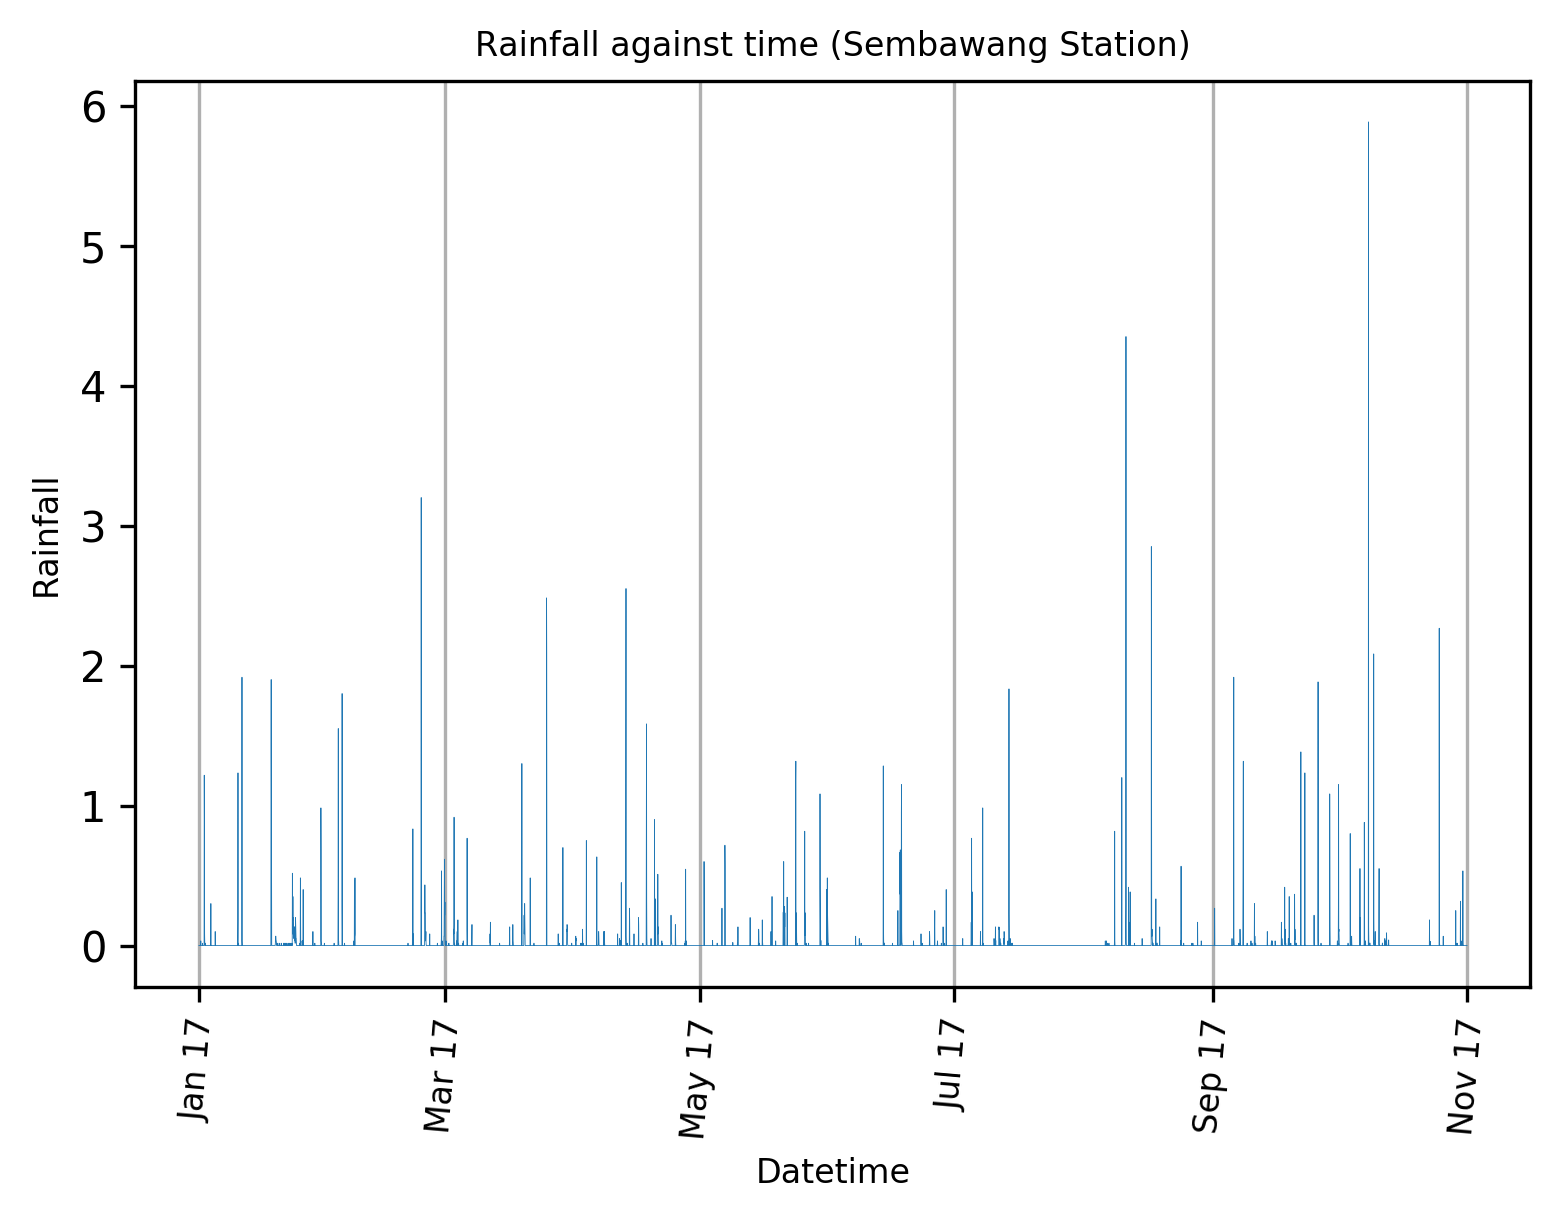

In [22]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledSembawang.index, upsampledSembawang['rainfall'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Rainfall', fontsize=8)
plt.title('Rainfall against time (Sembawang Station)', fontsize=8)

# Data imputation

## Interpolation 

### Find all combinations of features

In [23]:
features = ['temperature', 'wind_speed', 'rainfall', 'humidity']
combinations = []
for subset in itertools.combinations(features, 2):
    combinations.append(subset)

In [24]:
upsampledSembawang.head(5)

,index,timestamp,temperature,humidity,wind_speed,wind_direction,rainfall,year,month,day,hour,minute
timestamp,,,,,,,,,,,,
2017-01-01 00:00:00,6.462881e+06,1.483231e+09,26.559322,NaN,2.357627,310.745763,0.0,2017.0,1.0,1.0,1.0,1.0
2017-01-01 01:00:00,6.463936e+06,1.483234e+09,27.993333,93.308163,2.700000,208.982456,0.0,2017.0,1.0,1.0,1.0,1.0
2017-01-01 02:00:00,6.465007e+06,1.483238e+09,29.493333,79.156667,3.798333,30.466667,0.0,2017.0,1.0,1.0,1.0,1.0
2017-01-01 03:00:00,6.466070e+06,1.483241e+09,30.043333,73.045000,4.548333,36.966667,0.0,2017.0,1.0,1.0,1.0,1.0
2017-01-01 04:00:00,6.467130e+06,1.483245e+09,30.043333,74.505000,4.396667,28.883333,0.0,2017.0,1.0,1.0,1.0,1.0


In [25]:
upsampledSembawang.isna().sum()

index             0
timestamp         0
temperature       0
humidity          1
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

In [26]:
noNanSembawang = upsampledSembawang.dropna()

for combination in combinations:
    score = np.corrcoef(noNanSembawang[combination[0]], noNanSembawang[combination[1]])[0][1]
    print("Correlation (%s vs %s): %.5f" % (combination[0], combination[1], score))

Correlation (temperature vs wind_speed): 0.65183
Correlation (temperature vs rainfall): -0.10562
Correlation (temperature vs humidity): -0.81125
Correlation (wind_speed vs rainfall): 0.08167
Correlation (wind_speed vs humidity): -0.61175
Correlation (rainfall vs humidity): 0.02028


In [27]:
clf = LinearRegression().fit(np.array(noNanSembawang['rainfall']).reshape(-1, 1), np.array(noNanSembawang['humidity']).reshape(-1, 1))

In [28]:
upsampledSembawang.isna().sum()
# ip_temp_Semb = upsampledSembawang['temperature'].fillna()
# clf.predict(np.array([27.2]).reshape(1,-1))

index             0
timestamp         0
temperature       0
humidity          1
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

In [29]:
def prediction(feature):
    if math.isnan(feature) == False:
        return clf.predict(np.array([feature]).reshape(1, -1))[0][0]

humidity_interpolate = upsampledSembawang['rainfall'].apply(prediction)

upsampledSembawang['humidity'] = upsampledSembawang['humidity'].fillna(humidity_interpolate)
upsampledSembawang.isna().sum()

index             0
timestamp         0
temperature       0
humidity          0
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

Text(0.5,1,'Humidity against time (Sembawang Station)')

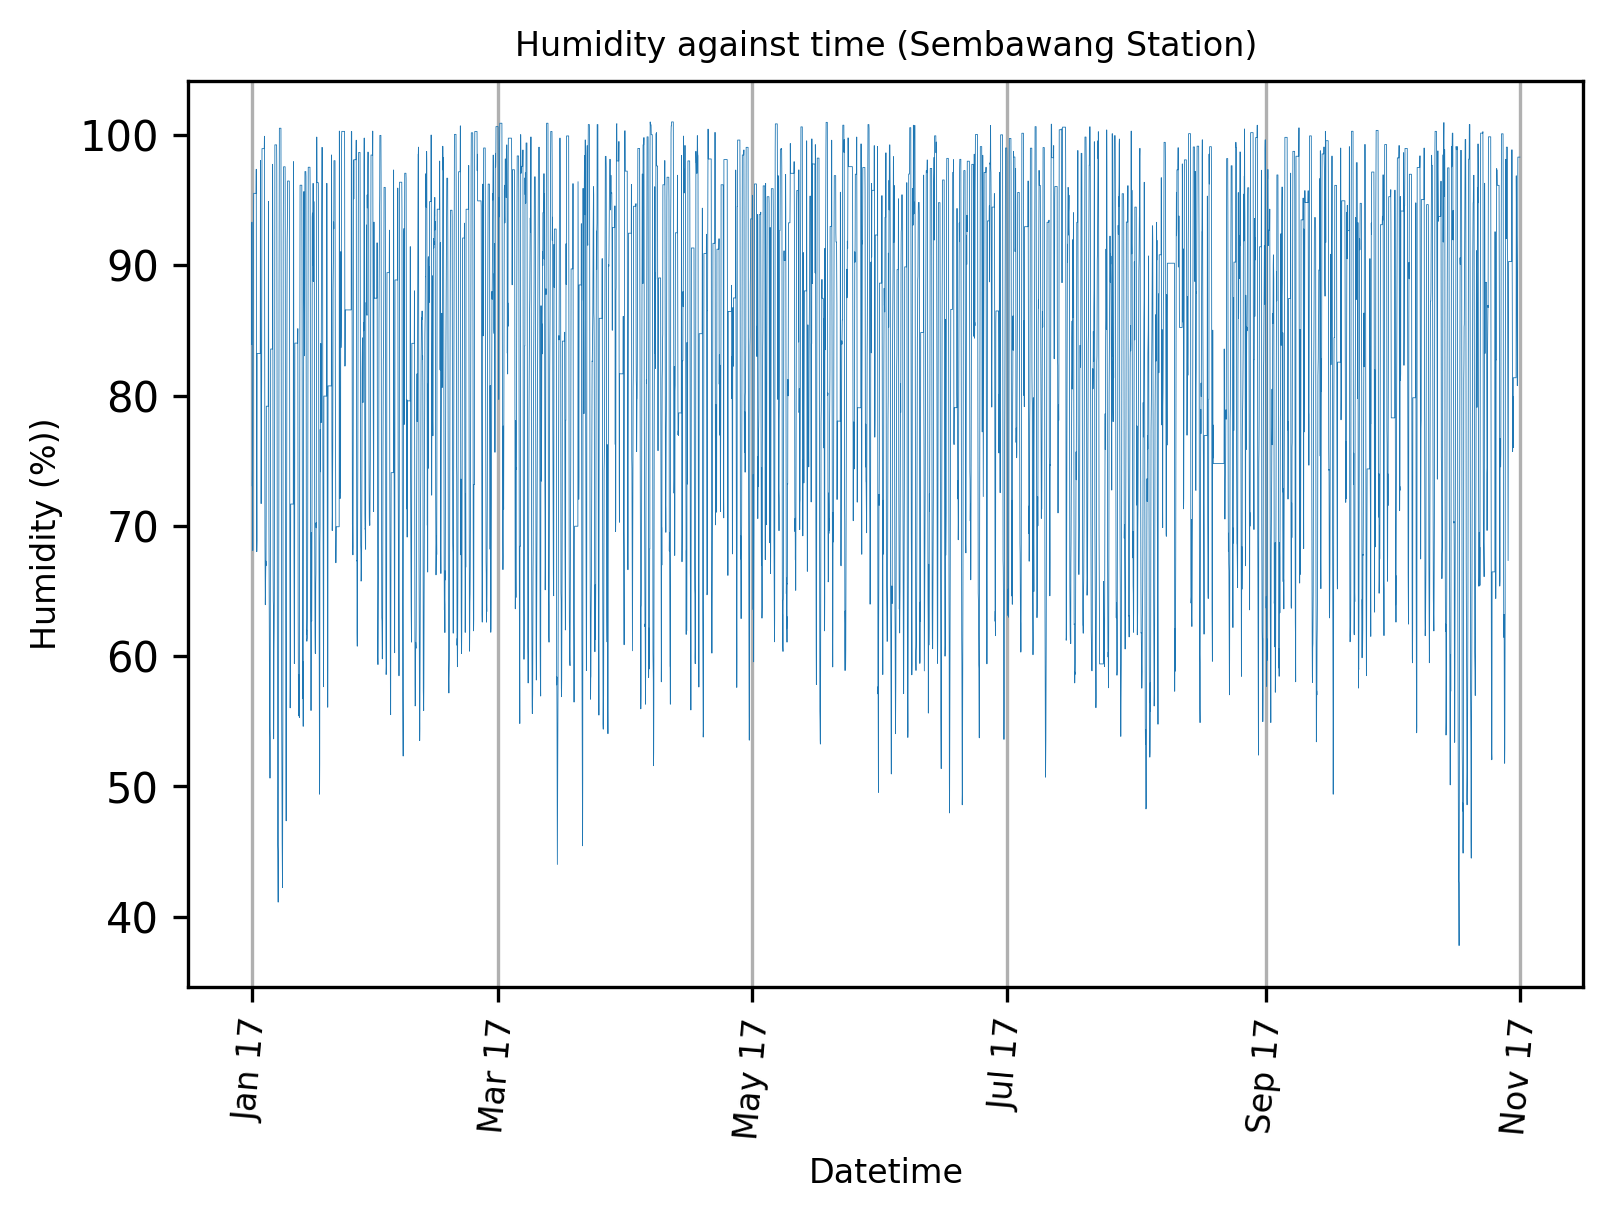

In [30]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledSembawang.index, upsampledSembawang['humidity'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Humidity (%))', fontsize=8)
plt.title('Humidity against time (Sembawang Station)', fontsize=8)

In [31]:
upsampledSembawang.tail(10)

,index,timestamp,temperature,humidity,wind_speed,wind_direction,rainfall,year,month,day,hour,minute
timestamp,,,,,,,,,,,,
2017-10-31 14:00:00,1.341184e+07,1.509460e+09,25.637037,98.3,0.853704,217.777778,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 15:00:00,1.359789e+07,1.509464e+09,25.477358,98.3,1.049057,248.735849,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 16:00:00,1.372740e+07,1.509467e+09,25.267308,98.3,1.494231,312.365385,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 17:00:00,1.322946e+07,1.509471e+09,25.114815,98.3,1.305556,310.814815,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 18:00:00,1.323040e+07,1.509475e+09,24.894643,98.3,1.166071,297.589286,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 19:00:00,1.341989e+07,1.509478e+09,24.552830,98.3,0.822642,240.037736,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 20:00:00,1.395992e+07,1.509482e+09,24.389583,98.3,1.416000,284.040000,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 21:00:00,1.323315e+07,1.509485e+09,24.135714,98.3,0.814286,263.267857,0.0,2017.0,10.0,31.0,31.0,31.0
2017-10-31 22:00:00,1.341588e+07,1.509489e+09,24.181818,98.3,1.118182,262.600000,0.0,2017.0,10.0,31.0,31.0,31.0


In [32]:
upsampledSembawang.to_hdf('data/2017_sembawang.h5', key = 'upsampledSembawang')